# Import Libraries

In [144]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

# Load Dataset

In [141]:
df=pd.read_csv('C:\\Users\\abc\\OneDrive\\Documents\\MyMachineLearningProjects\\StudentMarksPrediction\\student_info.csv')
df.head()

,study_hours,student_marks
0,6.83,78.50
1,6.56,76.74
2,NaN,78.68
3,5.67,71.82
4,8.67,84.19


# Data Preprocessing

In [142]:
cols=df.columns[(df.isnull().any())].tolist()
df[cols]=df[cols].fillna(df.mean())
df.sort_values(by=['student_marks'], inplace=True)

# Plotting the dataset

Text(0.5, 1.0, 'Student marks ans Study Hours Relation')

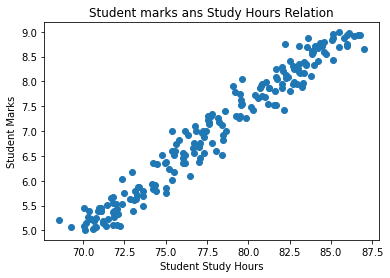

In [157]:
df.index=df.student_marks
plt.scatter(x=df.student_marks, y=df.study_hours)
plt.xlabel('Student Study Hours')
plt.ylabel('Student Marks')
plt.title('Student marks ans Study Hours Relation')

# Data Splitting

In [158]:
X=df.drop('student_marks', axis='columns')
y=df.drop('study_hours', axis='columns')
Xtrain, Xtest, ytrain, ytest=train_test_split(X, y, test_size=0.3)

# Develop Pipeline

In [135]:
myPipe=Pipeline(steps=[('preprocessing',MinMaxScaler()),('model',LinearRegression())])

# Data Training and Testing

In [ ]:
myPipe.fit(Xtrain,ytrain)
ypred=myPipe.predict(Xtest)

# Combining the test and Predicted Data 

In [138]:
df_new=pd.DataFrame(np.c_[Xtest, ytest, ypred],columns=['study_hours','student_marks','ypred'])


# Calculate Mean Square Error 

In [159]:
math.sqrt(mse(ypred,ytest))

6.42600708344929

# Plotting the Predicted Dataset 

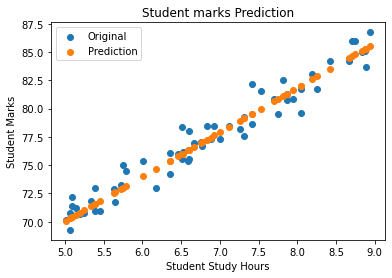

In [160]:
plt.scatter(x=df_new.study_hours, y=df_new.student_marks)
plt.scatter(x=df_new.study_hours, y=df_new.ypred)
plt.xlabel('Student Study Hours')
plt.ylabel('Student Marks')
plt.title('Student marks Prediction')
plt.legend(['Original','Prediction'])